#Q1---SVM

In [ ]:
import pandas as pd
import numpy as np
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
data = pd.read_csv(url,names=colnames)
X=data.drop('Class',axis=1)
Y=data['Class']


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y) #splitting data with 75% training samples for each class data

#SVM Classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred = svclassifier.predict(X_test)

#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[13  0  0]
 [ 0 11  2]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [ ]:
#SVM for 80%training samples

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y) #splitting data with 80% training samples for each class

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred = svclassifier.predict(X_test)

#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



#Q2--PCA

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset=pd.read_csv(url,names=["sepal length","sepal width","petal length","petal width","species"])
setosa=dataset[dataset['species']=='Iris-setosa']
versicolor =dataset[dataset['species']=='Iris-versicolor']
virginica =dataset[dataset['species']=='Iris-virginica']

<Figure size 432x288 with 0 Axes>

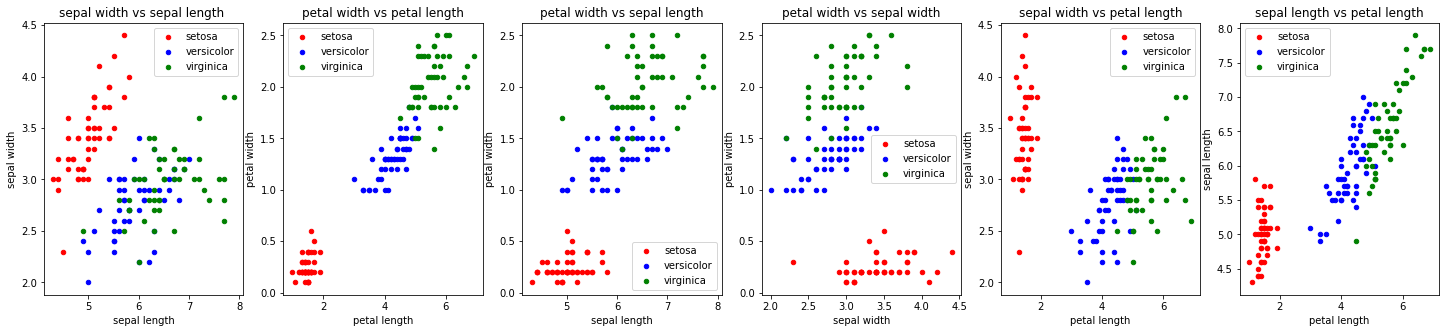

In [25]:
#Plotting of data
plt.figure()
fig,ax=plt.subplots(1,6,figsize=(25, 5))

setosa.plot(x="sepal length", y="sepal width", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="sepal length",y="sepal width",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="sepal length", y="sepal width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal length", y="petal width", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="petal length",y="petal width",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="petal length", y="petal width", kind="scatter", ax=ax[1], label='virginica', color='g')

setosa.plot(x="sepal length", y="petal width", kind="scatter",ax=ax[2],label='setosa',color='r')
versicolor.plot(x="sepal length",y="petal width",kind="scatter",ax=ax[2],label='versicolor',color='b')
virginica.plot(x="sepal length", y="petal width", kind="scatter", ax=ax[2], label='virginica', color='g')

setosa.plot(x="sepal width", y="petal width", kind="scatter",ax=ax[3],label='setosa',color='r')
versicolor.plot(x="sepal width",y="petal width",kind="scatter",ax=ax[3],label='versicolor',color='b')
virginica.plot(x="sepal width", y="petal width", kind="scatter", ax=ax[3], label='virginica', color='g')

setosa.plot(x="petal length", y="sepal width", kind="scatter",ax=ax[4],label='setosa',color='r')
versicolor.plot(x="petal length",y="sepal width",kind="scatter",ax=ax[4],label='versicolor',color='b')
virginica.plot(x="petal length", y="sepal width", kind="scatter", ax=ax[4], label='virginica', color='g')

setosa.plot(x="petal length", y="sepal length", kind="scatter",ax=ax[5],label='setosa',color='r')
versicolor.plot(x="petal length",y="sepal length",kind="scatter",ax=ax[5],label='versicolor',color='b')
virginica.plot(x="petal length", y="sepal length", kind="scatter", ax=ax[5], label='virginica', color='g')

ax[0].set(title='sepal width vs sepal length ',xlabel='sepal length', ylabel='sepal width')
ax[1].set(title='petal width vs petal length', xlabel='petal length', ylabel='petal width')
ax[2].set(title='petal width vs sepal length',xlabel='sepal length',  ylabel='petal width')
ax[3].set(title='petal width vs sepal width', xlabel='sepal width', ylabel='petal width')
ax[4].set(title='sepal width vs petal length',xlabel='petal length',  ylabel='sepal width')
ax[5].set(title='sepal length vs petal length', xlabel='petal length', ylabel='sepal length')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()

In [29]:
X=pd.read_csv(url,usecols=[0,1,2,3],header=None)
Y=pd.read_csv(url,usecols=[4],header=None)

#Normalization
min=np.zeros(X.shape[1])
max=np.zeros(X.shape[1])
for i in range(X.shape[1]):
  min[i]=X[i].min()
  max[i]=X[i].max()
  X[i]=(X[i]-min[i])/(max[i]-min[i])

#Mean array
mean=np.zeros(X.shape[1])
for i in range(X.shape[1]):
  mean[i]=X[i].mean()
X=X.to_numpy()

#Covariance matrix
sigma=np.zeros((4,4),dtype=float)
for j in range(4):
  for k in range(4):
    for n in range(150):
      sigma[j][k]+=((X[n][j]-mean[j])*(X[n][k]-mean[k]))/(149)

from numpy import linalg as LA
#Eigen value and eigen vector of covariance matrix
w, v = LA.eig(sigma)

#Taking largest two eigenvalues and eigenvectors
K=sorted(w)[:2]
A=[]
for i in range(w.shape[0]):
  for j in range(2):
    if w[i]==K[j]:
      A.append(v[i])
A=np.array(A)
A=np.transpose(A)
X=np.matrix(X)
A=np.matrix(A)
y=X*A

Text(0.5, 1.0, '2 feature plot')

<Figure size 432x288 with 0 Axes>

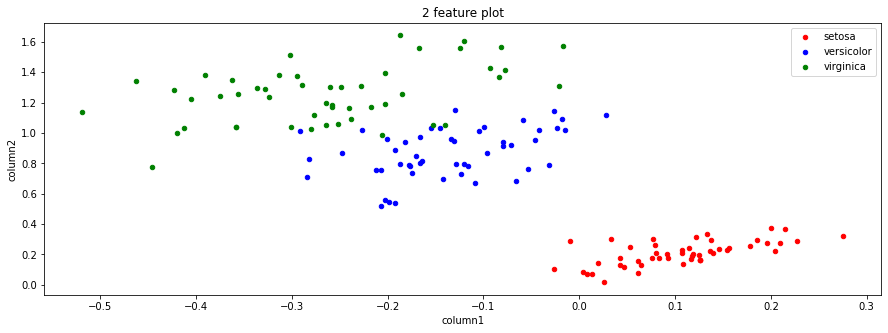

In [32]:
df = pd.DataFrame(data=y, columns=["column1", "column2"])
Y=dataset['species']
Y.to_numpy()
df['species'] = Y
setosa=df[df['species']=='Iris-setosa']
versicolor =df[df['species']=='Iris-versicolor']
virginica =df[df['species']=='Iris-virginica']
plt.figure()

fig,ax=plt.subplots(1,1,figsize=(15, 5))
setosa.plot(x="column1", y="column2", kind="scatter",ax=ax,label='setosa',color='r')
versicolor.plot(x="column1",y="column2",kind="scatter",ax=ax,label='versicolor',color='b')
virginica.plot(x="column1", y="column2", kind="scatter",ax=ax, label='virginica', color='g')
plt.title("2 feature plot")